<h1><b><Center>Question 1: Best-First Search in a Maze

In [45]:
import math
import queue

def best_first_search(maze, start, goal):
    visited = set()
    que = queue.PriorityQueue()
    que.put((heuristic[start], [start]))

    while not que.empty():
        cost, path = que.get()
        x, y = path[-1]

        if (x, y) == goal:
            return path

        visited.add((x, y))

        if x + 1 < len(maze) and (x + 1, y) not in visited and maze[x + 1][y] != 1:
            que.put((heuristic[(x + 1, y)], path + [(x + 1, y)]))

        if y + 1 < len(maze[0]) and (x, y + 1) not in visited and maze[x][y + 1] != 1:
            que.put((heuristic[(x, y + 1)], path + [(x, y + 1)]))

    return "No Path to Goal"

def compute_heuristic(goal):
    h = {}
    for i in range(5):
        for j in range(5):
            h[(i, j)] = math.sqrt((goal[0] - i) ** 2 + (goal[1] - j) ** 2)
    return h

# Input maze
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

heuristic = compute_heuristic(goal)

path = best_first_search(maze, start, goal)
print("Path found by Best First Search:")
print(path)


Path found by Best First Search:
[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2)]


<h1><b><Center>Question 2: A* Search

KeyError: ''

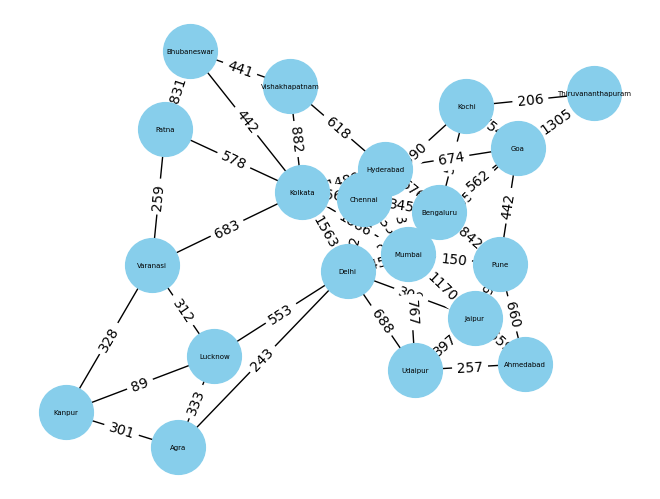

In [82]:
import networkx as nx 
import queue
import math

def arangeddata():
    with open("input.csv") as file:
        graph = []
        for entry in file.read().split("\n"):
            graph.append(list(entry.split(",")))
        graph.pop(0)
        graph.pop(len(graph)-1)
        for value in graph:
            value[2] = int(value[2])
    return graph
    
def ecludien_distance(pos, node, goal):
    x, y = pos[node]
    x2, y2 = pos[goal]
    return math.sqrt((x2 - x)**2 + (y2 - y)**2)

def calculate_cost(graph, path):
    cost = 0
    for i in range(len(path)-1):
        cost += graph[path[i]][path[i+1]]['weight']
    return cost

def astar(graph, start, goal, heuristic):
    visited = set()
    que = queue.PriorityQueue()
    que.put((0 + heuristic[start], [start]))

    while not que.empty():
        f, current_path = que.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path
        
        if current_node not in visited:
            visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_path = current_path + [neighbor]
                cost = calculate_cost(graph, new_path)
                que.put((cost + heuristic[neighbor], new_path))

    return []

graph = arangeddata()
G = nx.Graph()
edges = [(entry[0], entry[1], entry[2]) for entry in graph]
G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G)
edge_label = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=5)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_label)

start = input("Enter the Starting Point: ")
goal = input("Enter the destination point: ")

heuristic = {node: ecludien_distance(pos, node, goal) for node in G.nodes}

path = astar(G, start, goal, heuristic)
if path:
    print("Path found: {}".format(" -> ".join(path)))
else:
    print("No path found.")
